# 2.1

## a)

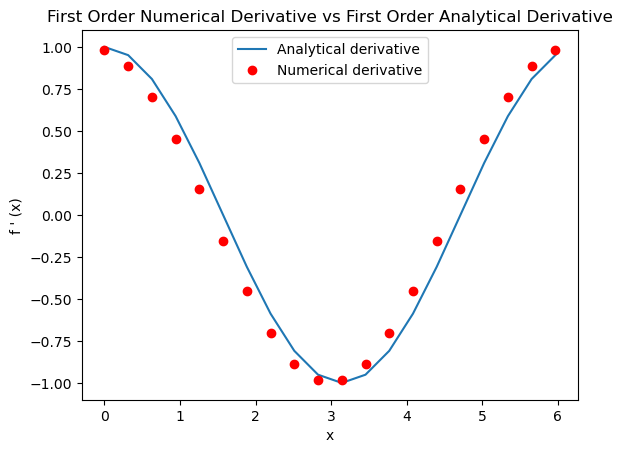

In [15]:
import numpy as np
import matplotlib.pyplot as plt
N = 20
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
dx = 2 * np.pi / N

# Numerical derivative using the given formula
fx = np.sin(x)
f_prime_numerical = (np.roll(fx, -1) - fx) / dx
f_prime_analytical = np.cos(x)


# Plotting
plt.plot(x, f_prime_analytical, label='Analytical derivative')
plt.plot(x, f_prime_numerical, 'ro', label='Numerical derivative')
plt.title('First Order Numerical Derivative vs First Order Analytical Derivative')
plt.xlabel('x')
plt.ylabel("f ' (x)")
plt.legend()
plt.show()

## b)

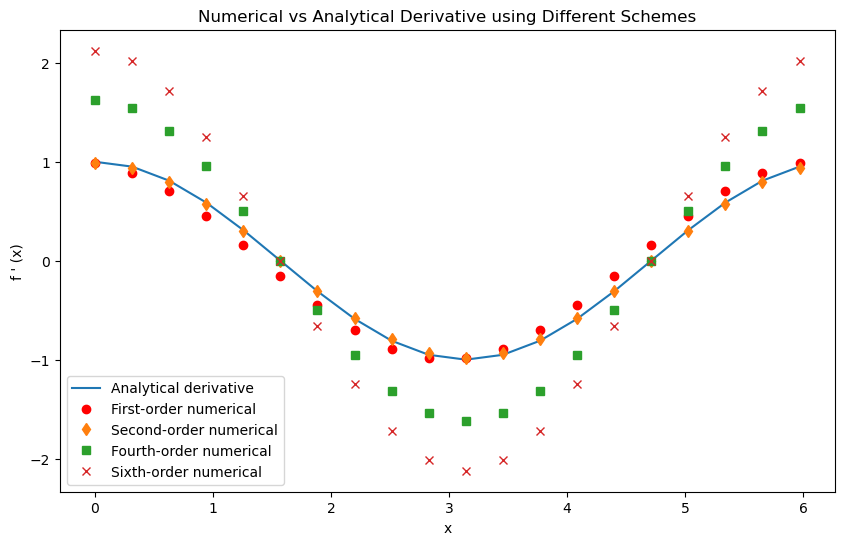

In [16]:
def second_order(fx, dx):
    return (np.roll(fx, -1) - np.roll(fx, 1)) / (2 * dx)

def fourth_order(fx, dx):
    return (np.roll(fx, -2) - np.roll(fx, 2) + 8 * np.roll(fx, -1) - 8 * np.roll(fx, 1)) / (12 * dx)

def sixth_order(fx, dx):
    return (np.roll(fx, -3) - np.roll(fx, 3) + 9 * np.roll(fx, -2) - 9 * np.roll(fx, 2) + 45 * np.roll(fx, -1) - 45 * np.roll(fx, 1)) / (60 * dx)

f_prime_second_order = second_order(fx, dx)
f_prime_fourth_order = fourth_order(fx, dx)
f_prime_sixth_order = sixth_order(fx, dx)

# Plot the results
# set figure size
plt.figure(figsize=(10, 6)) # otherwise legend is blocking the plot
plt.plot(x, f_prime_analytical, label='Analytical derivative')
plt.plot(x, f_prime_numerical, 'ro', label='First-order numerical')
plt.plot(x, f_prime_second_order, 'd', label='Second-order numerical')
plt.plot(x, f_prime_fourth_order, 's', label='Fourth-order numerical')
plt.plot(x, f_prime_sixth_order, 'x', label='Sixth-order numerical')
plt.xlabel('x')
plt.ylabel("f ' (x)")
plt.legend()
plt.title('Numerical vs Analytical Derivative using Different Schemes')
plt.show()



## c)

In [17]:
max_error_first_order = np.max(np.abs(f_prime_numerical - f_prime_analytical))
max_error_second_order = np.max(np.abs(f_prime_second_order - f_prime_analytical))
max_error_fourth_order = np.max(np.abs(f_prime_fourth_order - f_prime_analytical))
max_error_sixth_order = np.max(np.abs(f_prime_sixth_order - f_prime_analytical))

print(f"Max error first-order: {max_error_first_order}")
print(f"Max error second-order: {max_error_second_order}")
print(f"Max error fourth-order: {max_error_fourth_order}")
print(f"Max error sixth-order: {max_error_sixth_order}")


Max error first-order: 0.15579194727527879
Max error second-order: 0.016368356916534044
Max error fourth-order: 0.6233386187075012
Max error sixth-order: 1.122580404031797


## d)

In [19]:
N = np.logspace(1, 6, 50, dtype=int)
errors_first_order = []
errors_second_order = []
errors_fourth_order = []
errors_sixth_order = []

for n in N:
    x = np.linspace(0, 2 * np.pi, n, endpoint=False)
    dx = 2 * np.pi / N
    fx = np.sin(x)
    f_prime_analytical = np.cos(x)
    f_prime_numerical = (np.roll(fx, -1) - fx) / dx

    f_prime_second_order = second_order(fx, dx)
    f_prime_fourth_order = fourth_order(fx, dx)
    f_prime_sixth_order = sixth_order(fx, dx)
    max_error_first_order = np.max(np.abs(f_prime_numerical - f_prime_analytical))
    max_error_second_order = np.max(np.abs(f_prime_second_order - f_prime_analytical))
    max_error_fourth_order = np.max(np.abs(f_prime_fourth_order - f_prime_analytical))
    max_error_sixth_order = np.max(np.abs(f_prime_sixth_order - f_prime_analytical))
    errors_first_order += [max_error_first_order]
    errors_second_order += [max_error_second_order]
    errors_fourth_order += [max_error_fourth_order]
    errors_sixth_order += [max_error_sixth_order]

plt.figure(figsize=(10, 6))
plt.loglog(N, errors_first_order, label = 'first order')
plt.loglog(N, errors_second_order, label = 'second order')
plt.loglog(N, errors_fourth_order, label = 'fourth order')
plt.loglog(N, errors_sixth_order, label = 'sixth order')
plt.xlabel('N')
plt.ylabel('Max abs error')
plt.title('Max absm error vs N')
plt.legend()
plt.show()    

ValueError: operands could not be broadcast together with shapes (10,) (50,) 

## e)

## f)

## g)

# 2.3

## a)

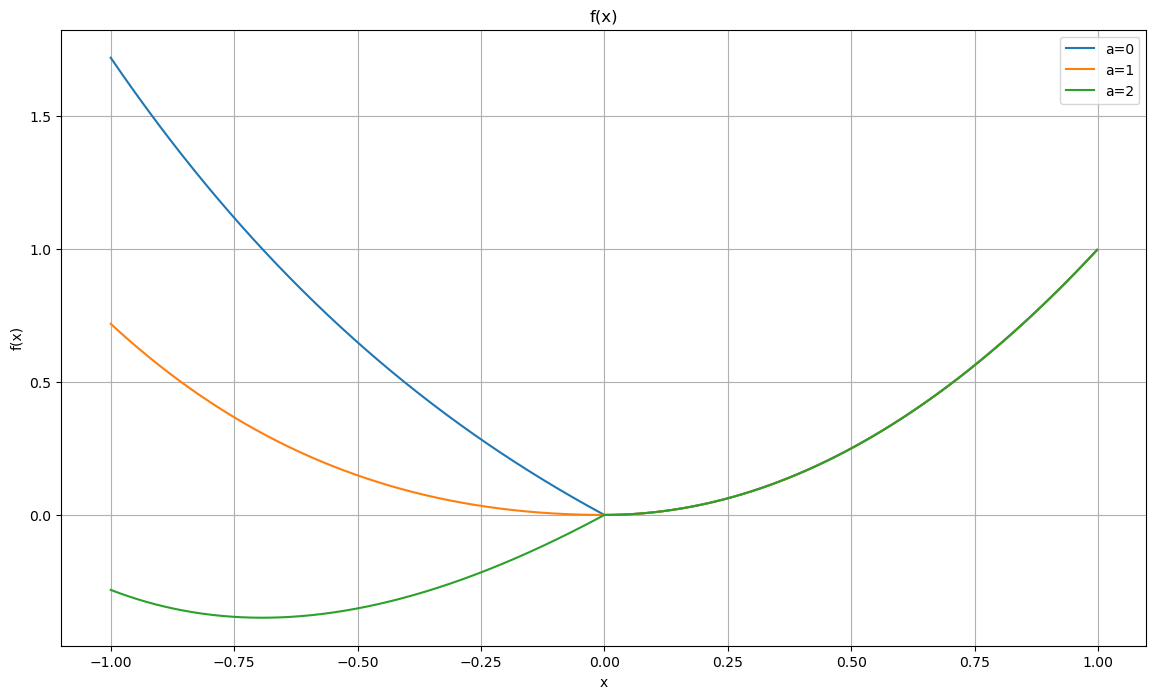

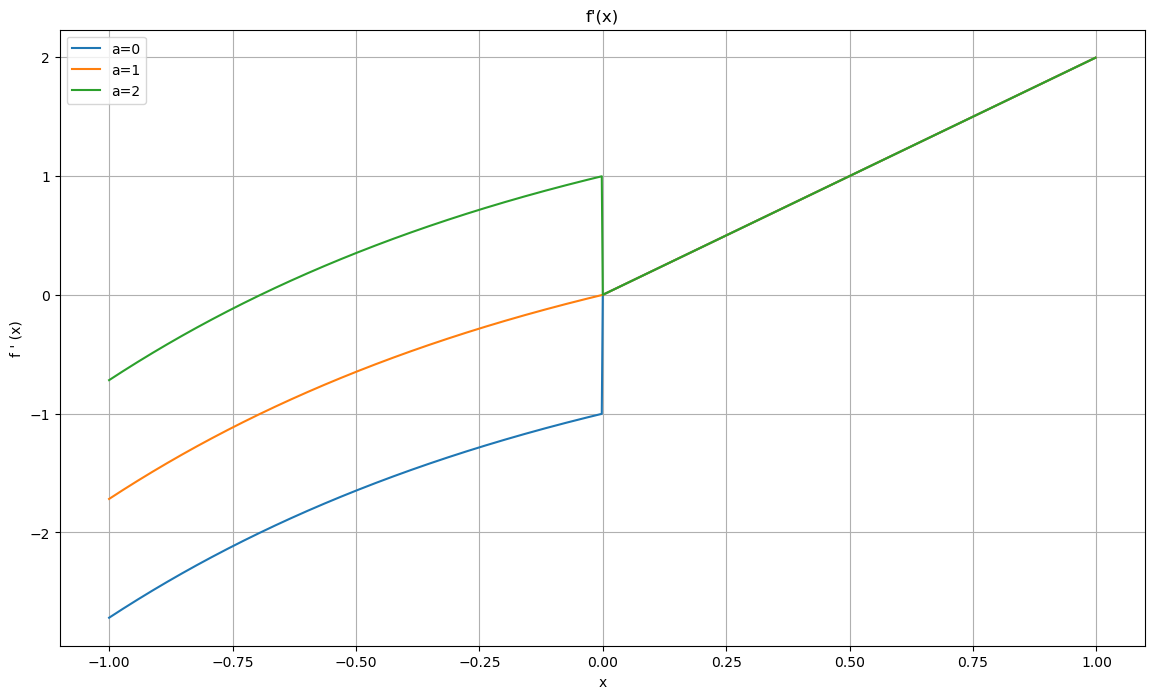

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(-1, 1, N, endpoint=False)

# Define the function and its analytical derivative using np.piecewise
def f(x, a):
    return np.piecewise(x, [x < 0, x > 0], [lambda x: np.exp(-x) + a * x - 1, lambda x: x**2])

def f_prime(x, a):
    return np.piecewise(x, [x < 0, x > 0], [lambda x: -np.exp(-x) + a, lambda x: 2 * x])

a_values = [0, 1, 2]

# plotting f(x) for different values of a
plt.figure(figsize=(14, 8))
for a in a_values:
    # Define the function and its derivative using np.piecewise
    f_values = f(x, a)
    plt.plot(x, f_values, label=f'a={a}')
    plt.title('f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
plt.show()

# plotting f'(x) for different values of a
plt.figure(figsize=(14, 8))
for a in a_values:
    f_prime_values = f_prime(x, a)
    plt.plot(x, f_prime_values, label=f'a={a}')
    plt.title("f'(x)")
    plt.xlabel('x')
    plt.ylabel("f ' (x)")
    plt.grid(True)
    plt.legend()
plt.show()

## b)

## c)

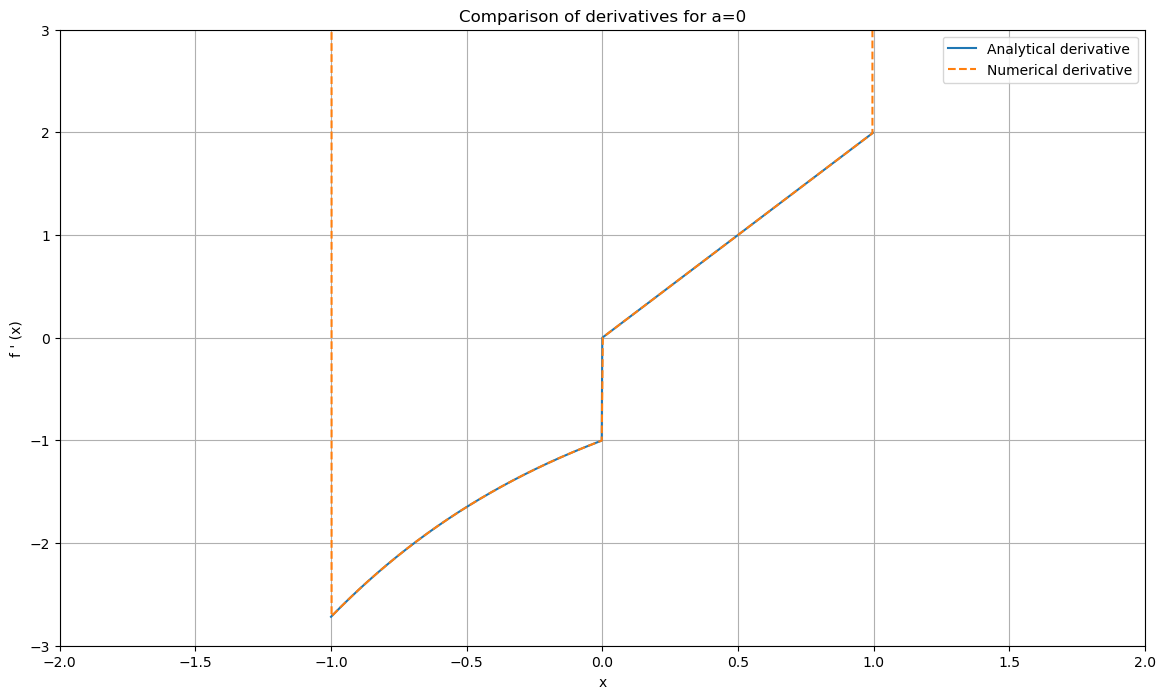

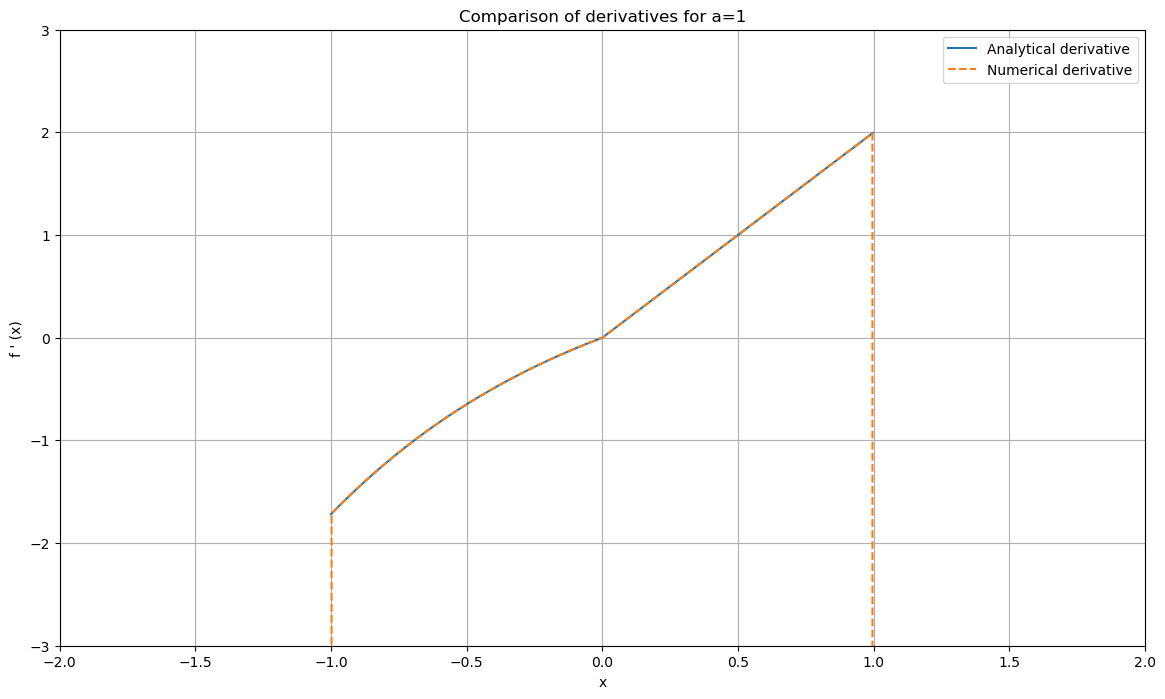

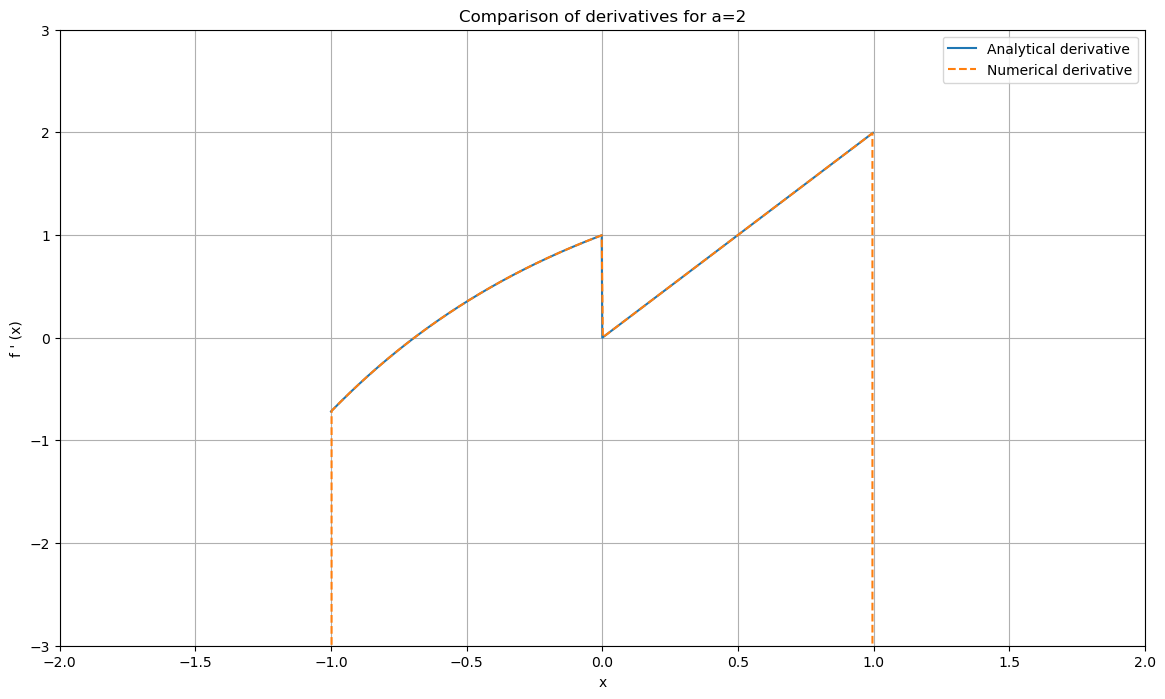

In [ ]:
dx = x[1] - x[0]
def central_second_order_finite_difference(fx,dx):
    return (np.roll(fx, -1) - np.roll(fx, 1)) / (2 * dx)

for a in a_values:
    f_prime_analytical = f_prime(x, a)
    
    f_values = f(x, a)
    f_prime_numerical = second_order(f_values, dx)
    
    plt.figure(figsize=(14, 8))
    plt.plot(x, f_prime_analytical, label='Analytical derivative')
    plt.plot(x, f_prime_numerical, label='Numerical derivative', linestyle='--')
    plt.title(f'Comparison of derivatives for a={a}')
    plt.xlabel('x')
    plt.ylabel("f ' (x)")
    plt.legend()
    plt.grid(True)
    plt.xlim(-2, 2)  # Zoom in near x=0
    plt.ylim(-3, 3)
    plt.show()


## d)

## e)

# 3.1

## a)

In [ ]:
alpha = 

## b)

## c)

# 3.3

## a)

## b)

## c)